#US Airline Sentiment Analysis from Twitter

Twitter Dataset https://www.kaggle.com/crowdflower/twitter-airline-sentiment

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
df=pd.read_csv('/content/Tweets.csv',encoding='latin-1', delimiter=',')

In [43]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [45]:
df.isnull().any()

tweet_id                        False
airline_sentiment               False
airline_sentiment_confidence    False
negativereason                   True
negativereason_confidence        True
airline                         False
airline_sentiment_gold           True
name                            False
negativereason_gold              True
retweet_count                   False
text                            False
tweet_coord                      True
tweet_created                   False
tweet_location                   True
user_timezone                    True
dtype: bool

In [46]:
print(len(df[df['airline_sentiment_confidence'] <=0.8]))

4181


In [47]:
df = df[df['airline_sentiment_confidence'] >=0.8]
df = df.reset_index()

df.shape

(10459, 16)

In [48]:
df=df.drop(['tweet_id','airline_sentiment_confidence','negativereason','negativereason_confidence','airline','airline_sentiment_gold',
                'name','negativereason_gold','retweet_count','tweet_coord','tweet_created','tweet_location','user_timezone'],axis=1)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10459 entries, 0 to 10458
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              10459 non-null  int64 
 1   airline_sentiment  10459 non-null  object
 2   text               10459 non-null  object
dtypes: int64(1), object(2)
memory usage: 245.3+ KB


In [50]:
df.head()


,index,airline_sentiment,text
0,0,neutral,@VirginAmerica What @dhepburn said.
1,3,negative,@VirginAmerica it's really aggressive to blast...
2,4,negative,@VirginAmerica and it's a really big bad thing...
3,5,negative,@VirginAmerica seriously would pay $30 a fligh...
4,9,positive,"@VirginAmerica it was amazing, and arrived an ..."


In [51]:
df['airline_sentiment'].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [52]:
df['sentiment']=df['airline_sentiment'].map({'neutral':1,'negative':0,'positive':2})
df.head(10)

,index,airline_sentiment,text,sentiment
0,0,neutral,@VirginAmerica What @dhepburn said.,1
1,3,negative,@VirginAmerica it's really aggressive to blast...,0
2,4,negative,@VirginAmerica and it's a really big bad thing...,0
3,5,negative,@VirginAmerica seriously would pay $30 a fligh...,0
4,9,positive,"@VirginAmerica it was amazing, and arrived an ...",2
5,11,positive,@VirginAmerica I &lt;3 pretty graphics. so muc...,2
6,12,positive,@VirginAmerica This is such a great deal! Alre...,2
7,14,positive,@VirginAmerica Thanks!,2
8,16,positive,@VirginAmerica So excited for my first cross c...,2
9,17,negative,@VirginAmerica I flew from NYC to SFO last we...,0


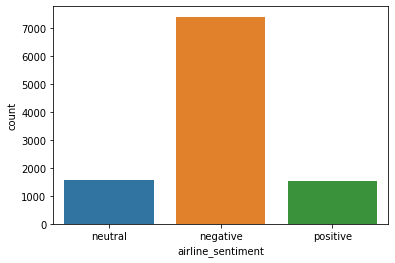

In [53]:
df['airline_sentiment'].value_counts()
sns.countplot(x='airline_sentiment',data=df)

In [54]:
#Balancing number of targets
pdf = df[df['airline_sentiment']=='positive']
ndf = df[df['airline_sentiment']=='neutral']
df =pd.concat([df,ndf,pdf,ndf,pdf,pdf])
df = df.reset_index()
df.shape

(18110, 5)

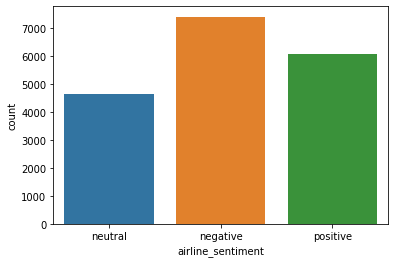

In [55]:
df['airline_sentiment'].value_counts()
sns.countplot(x='airline_sentiment',data=df)

###Data cleaning and preprocessing

In [56]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

<p>Lemmatization & removing stopwords

In [57]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wordnet=WordNetLemmatizer()
text_lemm = []
for i in range(0, len(df['text'])):
    review = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    review = review.lower()
    review = review.split()
    review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    text_lemm.append(review)

In [58]:
df['text_lemm']=pd.Series(text_lemm)
df.head()

,level_0,index,airline_sentiment,text,sentiment,text_lemm
0,0,0,neutral,@VirginAmerica What @dhepburn said.,1,virginamerica dhepburn said
1,1,3,negative,@VirginAmerica it's really aggressive to blast...,0,virginamerica really aggressive blast obnoxiou...
2,2,4,negative,@VirginAmerica and it's a really big bad thing...,0,virginamerica really big bad thing
3,3,5,negative,@VirginAmerica seriously would pay $30 a fligh...,0,virginamerica seriously would pay flight seat ...
4,4,9,positive,"@VirginAmerica it was amazing, and arrived an ...",2,virginamerica amazing arrived hour early good


<p>Creating the Bag of Words model

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer()
X=vect.fit_transform(df.text_lemm)
print(sorted(vect.vocabulary_))
print(X.shape)
print(X.toarray())

['aa', 'aaaand', 'aaadvantage', 'aacustomerservice', 'aadavantage', 'aadelay', 'aadv', 'aadvantage', 'aafail', 'aakjumxa', 'aal', 'aaron', 'aarp', 'aateam', 'aau', 'aavvoreph', 'aback', 'abandon', 'abandoned', 'abandonment', 'abassinet', 'abc', 'abcnetwork', 'abcnews', 'abducted', 'ability', 'able', 'aboard', 'aboout', 'abounds', 'abq', 'abroad', 'absolute', 'absolutely', 'absorber', 'absurd', 'absurdity', 'absurdly', 'abt', 'abtwf', 'abundance', 'abuse', 'abused', 'abxrq', 'abysmal', 'ac', 'acarl', 'acc', 'accelerate', 'accept', 'acceptable', 'accepted', 'accepting', 'acces', 'access', 'accessibility', 'accessible', 'accessing', 'accident', 'accidentally', 'accommodate', 'accommodated', 'accommodating', 'accommodation', 'accompaniment', 'accompany', 'accomplish', 'accomplished', 'according', 'accordingly', 'account', 'accountability', 'accruing', 'acct', 'accumulation', 'accurate', 'accused', 'acebo', 'achieve', 'achieves', 'achieving', 'ack', 'acknowledge', 'acknowledgement', 'acknow

<p>Creating the TF-IDF model

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
vect = TfidfVectorizer()
tfidf_matrix = vect.fit_transform(df['text_lemm'])
print(vect.get_feature_names())
print(tfidf_matrix.shape)
df1= pd.DataFrame(tfidf_matrix.toarray(), columns = vect.get_feature_names())
df1.head()

['aa', 'aaaand', 'aaadvantage', 'aacustomerservice', 'aadavantage', 'aadelay', 'aadv', 'aadvantage', 'aafail', 'aakjumxa', 'aal', 'aaron', 'aarp', 'aateam', 'aau', 'aavvoreph', 'aback', 'abandon', 'abandoned', 'abandonment', 'abassinet', 'abc', 'abcnetwork', 'abcnews', 'abducted', 'ability', 'able', 'aboard', 'aboout', 'abounds', 'abq', 'abroad', 'absolute', 'absolutely', 'absorber', 'absurd', 'absurdity', 'absurdly', 'abt', 'abtwf', 'abundance', 'abuse', 'abused', 'abxrq', 'abysmal', 'ac', 'acarl', 'acc', 'accelerate', 'accept', 'acceptable', 'accepted', 'accepting', 'acces', 'access', 'accessibility', 'accessible', 'accessing', 'accident', 'accidentally', 'accommodate', 'accommodated', 'accommodating', 'accommodation', 'accompaniment', 'accompany', 'accomplish', 'accomplished', 'according', 'accordingly', 'account', 'accountability', 'accruing', 'acct', 'accumulation', 'accurate', 'accused', 'acebo', 'achieve', 'achieves', 'achieving', 'ack', 'acknowledge', 'acknowledgement', 'acknow

,aa,aaaand,aaadvantage,aacustomerservice,aadavantage,aadelay,aadv,aadvantage,aafail,aakjumxa,aal,aaron,aarp,aateam,aau,aavvoreph,aback,abandon,abandoned,abandonment,abassinet,abc,abcnetwork,abcnews,abducted,ability,able,aboard,aboout,abounds,abq,abroad,absolute,absolutely,absorber,absurd,absurdity,absurdly,abt,abtwf,...,zfroinpszi,zfv,zgoqoxjbqy,zgw,zhmfdiw,zi,zik,zip,zipper,zira,zj,zkatcher,zkoe,zlsquu,zlzmk,zombie,zone,zoom,zouowgv,zpjr,zpu,zpz,zr,zrh,zsdgzydnde,zsuztnaijq,zt,ztua,zukes,zurich,zut,zv,zvugmkjw,zwzc,zxzn,zy,zygjs,zz,zza,zzkqwwbjz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<p>Train Test Split

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df1,df.sentiment,test_size = 0.20 , random_state = 0)

In [62]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
models={LinearSVC(),LogisticRegression(),MultinomialNB()}
for model in models:
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print("{} : accuracy score: {}%".format(model,round(accuracy_score(y_test,y_pred)*100,2)))
  print("\n\n",confusion_matrix(y_test,y_pred))
  print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) : accuracy score: 90.17%


 [[1326  105   51]
 [ 112  826   35]
 [  26   27 1114]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1482
           1       0.86      0.85      0.86       973
           2       0.93      0.95      0.94      1167

    accuracy                           0.90      3622
   macro avg       0.90      0.90      0.90      3622
weighted avg       0.90      0.90      0.90      3622

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) : accuracy score: 84.59%


 [[1383   33   66]
 [ 290  584   99]
 [  60   10 1097]]
              precision    recall  f1-score   support

           0 